<a href="https://colab.research.google.com/github/Karolina-Bogacka/transbajki/blob/master/transbajki_forecastking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from functools import partial
import numpy as np
import requests
import glob
import datetime
from meteostat import Point, Daily, Stations, Hourly

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive

'Advanced ML (For the Non-Advanced) .gdoc'
 Barrows.zip
 CCPresentationNotes.gdoc
'CNN letter Dataset'
'Colab Notebooks'
 content
 data-local.zip
 data.zip
 Data.zip
'Deprecated: LineOfLeastResistance_Tests.gdoc'
'dlt :T:T:T:T:T:T:T.gdoc'
'Dokument bez tytułu (1).gdoc'
'Dokument bez tytułu.gdoc'
'fl experiments.gdoc'
 frozen_east_text_detection.pb
 git.gdoc
 Github
'grouped-weather-rowerki(2).csv'
'IMG_4438[1705].gdoc'
'IMG_4438[1705].jpg'
 IMG.gdoc
 IMG.jpg
'Inni ludzie.gdoc'
'Jury Mail.gdoc'
 masters.gdoc
 master-thesis-results
'medytujący google docs.gdoc'
 methodology.gdoc
'poetry generation.gdoc'
 rowerki.zip
 ssh.gdoc
 Teams.gsheet
 token.gdoc
 trolls


In [ ]:
!pip install meteostat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! unzip drive/MyDrive/rowerki.zip

Archive:  drive/MyDrive/rowerki.zip
   creating: rowerki/
  inflating: rowerki/1651933303.csv  
  inflating: rowerki/1651389703.csv  
  inflating: rowerki/1650820903.csv  
  inflating: rowerki/1651130504.csv  
  inflating: rowerki/1651179104.csv  
  inflating: rowerki/1650925304.csv  
  inflating: rowerki/1651261903.csv  
  inflating: rowerki/1651645303.csv  
  inflating: rowerki/1651114303.csv  
  inflating: rowerki/1651936904.csv  
  inflating: rowerki/1650891104.csv  
  inflating: rowerki/1651593104.csv  
  inflating: rowerki/1651441903.csv  
  inflating: rowerki/1651690304.csv  
  inflating: rowerki/1651276304.csv  
  inflating: rowerki/1651008104.csv  
  inflating: rowerki/1651022504.csv  
  inflating: rowerki/1651116104.csv  
  inflating: rowerki/1651942303.csv  
  inflating: rowerki/1650903704.csv  
  inflating: rowerki/1651143104.csv  
  inflating: rowerki/1651425704.csv  
  inflating: rowerki/1651135904.csv  
  inflating: rowerki/1651411304.csv  
  inflating: rowerki/165120970

In [ ]:
df = pd.read_csv("rowerki/1651366304.csv")
df.head(20)

,date,station_id,bike_number,bike_type,state
0,2022-05-01 00:51,2585259,27705,174,ok
1,2022-05-01 00:51,2585259,27644,174,ok
2,2022-05-01 00:51,2585259,25756,174,ok
3,2022-05-01 00:51,2585259,96440,174,ok
4,2022-05-01 00:51,2585259,96252,174,ok
5,2022-05-01 00:51,2585259,97429,174,ok
6,2022-05-01 00:51,2585259,97571,174,ok
7,2022-05-01 00:51,2585259,29665,4,ok
8,2022-05-01 00:51,2585259,76796,174,ok
9,2022-05-01 00:51,2585263,25009,174,ok


Read all the csv files from directory

In [ ]:
to_read = glob.glob("rowerki/*.csv")
rowerki_df = pd.concat(map(pd.read_csv, to_read))

In [ ]:
rowerki_df.head()

,date,station_id,bike_number,bike_type,state
0,2022-04-27 23:51,2585259,24900,174,ok
1,2022-04-27 23:51,2585259,24774,174,ok
2,2022-04-27 23:51,2585259,24584,174,ok
3,2022-04-27 23:51,2585259,28546,174,ok
4,2022-04-27 23:51,2585259,28356,174,ok


In [ ]:
len(rowerki_df)

11410902

Add those latitude longitude with request to nextbike api

In [ ]:
json = requests.get("https://nextbike.net/maps/nextbike-official.json?city=372,210,475").json()
data = []
for city in json["countries"][0]['cities']:
    for place in city['places']:
        data.append({col: place[col] for col in ['uid', 'lat', 'lng', 'name','bike_racks']})
stations = pd.DataFrame(data)
stations.sort_values("bike_racks")

,uid,lat,lng,name,bike_racks
329,2681635,52.234390,20.999159,Spektrum Tower,11
342,18751910,52.183037,20.991542,Signum Work Station,12
348,55316960,52.196220,20.938810,Bolero,15
76,2585400,52.231450,20.988690,Prosta - Wronia,15
267,2586001,52.247314,21.042731,Metro Stadion Narodowy,15
...,...,...,...,...,...
201,2585885,52.157289,21.044008,Rosoła - Ciszewskiego - SGGW,30
207,2585901,52.142720,21.038362,Pileckiego - Alternatywy,30
60,2585369,52.244947,21.001294,Andersa - Długa,30
311,4393742,52.239409,21.031010,Metro Centrum Nauki Kopernik,30


In [ ]:
rowerki_df = pd.merge(rowerki_df, stations, left_on='station_id', right_on='uid')
rowerki_df.head()

,date,station_id,bike_number,bike_type,state,uid,lat,lng,name,bike_racks
0,2022-05-19 20:34,2585259,24935,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30
1,2022-05-19 20:34,2585259,24801,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30
2,2022-05-19 20:34,2585259,28659,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30
3,2022-05-19 20:34,2585259,26454,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30
4,2022-05-19 20:34,2585259,26105,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30


In [ ]:
rowerki_df['hour'] = pd.to_datetime(rowerki_df['date']).dt.floor('H')
rowerki_df.head()

,date,station_id,bike_number,bike_type,state,uid,lat,lng,name,bike_racks,hour
0,2022-05-19 20:34,2585259,24935,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00
1,2022-05-19 20:34,2585259,24801,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00
2,2022-05-19 20:34,2585259,28659,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00
3,2022-05-19 20:34,2585259,26454,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00
4,2022-05-19 20:34,2585259,26105,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00


In [ ]:
rowerki_df['hour'] = pd.to_datetime(rowerki_df['date']).dt.floor('H')
rowerki_df.head()

,date,station_id,bike_number,bike_type,state,uid,lat,lng,name,bike_racks,hour
0,2022-04-27 23:51,2585259,24900,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-04-27 23:00:00
1,2022-04-27 23:51,2585259,24774,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-04-27 23:00:00
2,2022-04-27 23:51,2585259,24584,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-04-27 23:00:00
3,2022-04-27 23:51,2585259,28546,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-04-27 23:00:00
4,2022-04-27 23:51,2585259,28356,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-04-27 23:00:00


In [ ]:
# let's begin with predicting just normal bikes
rowerki_df = rowerki_df[rowerki_df['bike_type']==174]
rowerki_df.head()

,date,station_id,bike_number,bike_type,state,uid,lat,lng,name,bike_racks,hour
0,2022-05-19 20:34,2585259,24935,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00
1,2022-05-19 20:34,2585259,24801,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00
2,2022-05-19 20:34,2585259,28659,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00
3,2022-05-19 20:34,2585259,26454,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00
4,2022-05-19 20:34,2585259,26105,174,ok,2585259,52.296298,20.958358,Dewajtis - UKSW,30,2022-05-19 20:00:00


In [ ]:
grouped_df = rowerki_df.groupby(['hour', 'station_id'])['bike_number'].nunique().reset_index()
grouped_df.head()

KeyboardInterrupt: ignored

In [ ]:
counted_correctly = rowerki_df.groupby(['date', 'station_id'])['bike_number'].nunique().reset_index()
counted_correctly.head()

,date,station_id,bike_number
0,2022-04-24 15:44,448565,3
1,2022-04-24 15:44,448566,3
2,2022-04-24 15:44,1154451,6
3,2022-04-24 15:44,2585259,19
4,2022-04-24 15:44,2585263,12


In [ ]:
counted_correctly['hour'] = pd.to_datetime(counted_correctly['date']).dt.floor('H')
counted_correctly.head()

,date,station_id,bike_number,hour
0,2022-04-24 15:44,448565,3,2022-04-24 15:00:00
1,2022-04-24 15:44,448566,3,2022-04-24 15:00:00
2,2022-04-24 15:44,1154451,6,2022-04-24 15:00:00
3,2022-04-24 15:44,2585259,19,2022-04-24 15:00:00
4,2022-04-24 15:44,2585263,12,2022-04-24 15:00:00


In [ ]:
counted_correctly.head()

,date,station_id,bike_number,hour
0,2022-04-24 15:44,448565,3,2022-04-24 15:00:00
1,2022-04-24 15:44,448566,3,2022-04-24 15:00:00
2,2022-04-24 15:44,1154451,6,2022-04-24 15:00:00
3,2022-04-24 15:44,2585259,19,2022-04-24 15:00:00
4,2022-04-24 15:44,2585263,12,2022-04-24 15:00:00


In [ ]:
grouped_df['hour'] = grouped_df.hour.astype('datetime64[ns]')
counted_correctly['hour'] = counted_correctly.hour.astype('datetime64[ns]')
counted_correctly = pd.merge(counted_correctly, grouped_df, how='left',left_on=['hour', 'station_id'], right_on=['hour','station_id'])
counted_correctly.head()

,date,station_id,bike_number_x,hour,bike_number_y,uid,lat,lng,name,bike_racks,temp,dwpt,rhum,wdir,wspd,pres
0,2022-04-24 15:44,448565,3,2022-04-24 15:00:00,4,448565,52.183992,21.009840,Nestle House,15,15.0,4.1,48.0,50.0,19.0,1005.0
1,2022-04-24 15:44,448566,3,2022-04-24 15:00:00,3,448566,52.177909,20.997491,New City,15,15.0,4.1,48.0,50.0,19.0,1005.0
2,2022-04-24 15:44,1154451,6,2022-04-24 15:00:00,6,1154451,52.230327,20.982705,Proximo,20,15.0,4.1,48.0,50.0,19.0,1005.0
3,2022-04-24 15:44,2585259,19,2022-04-24 15:00:00,19,2585259,52.296298,20.958358,Dewajtis - UKSW,30,15.0,4.1,48.0,50.0,19.0,1005.0
4,2022-04-24 15:44,2585263,12,2022-04-24 15:00:00,12,2585263,52.290974,20.929556,Metro Młociny,30,15.0,4.1,48.0,50.0,19.0,1005.0


Encode station id and clean data before feeding it to an LSTM. Drop unnecessary columns. Discard long/lat data

In [ ]:
counted_correctly.drop(['uid', 'bike_number_y', 'lat', 'lng', 'hour', 'name', 'bike_racks'],inplace=True, axis=1)
counted_correctly.head()

,date,station_id,bike_number_x,temp,dwpt,rhum,wdir,wspd,pres
0,2022-04-24 15:44,448565,3,15.0,4.1,48.0,50.0,19.0,1005.0
1,2022-04-24 15:44,448566,3,15.0,4.1,48.0,50.0,19.0,1005.0
2,2022-04-24 15:44,1154451,6,15.0,4.1,48.0,50.0,19.0,1005.0
3,2022-04-24 15:44,2585259,19,15.0,4.1,48.0,50.0,19.0,1005.0
4,2022-04-24 15:44,2585263,12,15.0,4.1,48.0,50.0,19.0,1005.0


In [ ]:
counted_correctly

In [ ]:
counted_correctly.corr()

,station_id,bike_number_x,temp,dwpt,rhum,wdir,wspd,pres
station_id,1.000000,-0.075433,0.003207,0.000824,-0.001749,-0.000050,0.004476,-0.001824
bike_number_x,-0.075433,1.000000,-0.080622,0.010764,0.075910,-0.037641,-0.034707,-0.002424
temp,0.003207,-0.080622,1.000000,0.263991,-0.643234,0.249517,0.355764,-0.242129
dwpt,0.000824,0.010764,0.263991,1.000000,0.544923,0.342036,0.242822,-0.745856
rhum,-0.001749,0.075910,-0.643234,0.544923,1.000000,0.075817,-0.143156,-0.380416
wdir,-0.000050,-0.037641,0.249517,0.342036,0.075817,1.000000,0.268171,-0.275165
wspd,0.004476,-0.034707,0.355764,0.242822,-0.143156,0.268171,1.000000,-0.360406
pres,-0.001824,-0.002424,-0.242129,-0.745856,-0.380416,-0.275165,-0.360406,1.000000


In [ ]:
counted_correctly.drop(['bike_number'],inplace=True, axis=1)

In [ ]:
counted_correctly.isnull().sum()

date             0
station_id       0
bike_number_x    0
temp             0
dwpt             0
rhum             0
wdir             0
wspd             0
pres             0
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
counted_correctly["station_id"] = ord_enc.fit_transform(counted_correctly[["station_id"]])
counted_correctly.head(11)

,date,station_id,bike_number_x,temp,dwpt,rhum,wdir,wspd,pres
0,2022-04-24 15:44,0.0,3,15.0,4.1,48.0,50.0,19.0,1005.0
1,2022-04-24 15:44,1.0,3,15.0,4.1,48.0,50.0,19.0,1005.0
2,2022-04-24 15:44,2.0,6,15.0,4.1,48.0,50.0,19.0,1005.0
3,2022-04-24 15:44,3.0,19,15.0,4.1,48.0,50.0,19.0,1005.0
4,2022-04-24 15:44,4.0,12,15.0,4.1,48.0,50.0,19.0,1005.0
5,2022-04-24 15:44,5.0,16,15.0,4.1,48.0,50.0,19.0,1005.0
6,2022-04-24 15:44,6.0,8,15.0,4.1,48.0,50.0,19.0,1005.0
7,2022-04-24 15:44,7.0,12,15.0,4.1,48.0,50.0,19.0,1005.0
8,2022-04-24 15:44,8.0,1,15.0,4.1,48.0,50.0,19.0,1005.0
9,2022-04-24 15:44,9.0,13,15.0,4.1,48.0,50.0,19.0,1005.0


In [ ]:
len(counted_correctly)

851790

Scale weather values

In [ ]:
counted_correctly['date'] = pd.to_numeric(pd.to_datetime(counted_correctly.date))
counted_correctly.head()

,date,station_id,bike_number_x,temp,dwpt,rhum,wdir,wspd,pres
0,1650815040000000000,0.0,3,15.0,4.1,48.0,50.0,19.0,1005.0
1,1650815040000000000,1.0,3,15.0,4.1,48.0,50.0,19.0,1005.0
2,1650815040000000000,2.0,6,15.0,4.1,48.0,50.0,19.0,1005.0
3,1650815040000000000,3.0,19,15.0,4.1,48.0,50.0,19.0,1005.0
4,1650815040000000000,4.0,12,15.0,4.1,48.0,50.0,19.0,1005.0


In [ ]:
counted_values = counted_correctly.values
counted_values = counted_values.astype('float32')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

counted_correctly[[ 'date','bike_number_x', 'station_id','temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres']] = scaler.fit_transform(counted_correctly[[ 'date','bike_number_x', 'station_id','temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres']])

In [ ]:
counted_correctly.head()

,date,station_id,bike_number_x,temp,dwpt,rhum,wdir,wspd,pres
0,0.0,0.000000,0.010256,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074
1,0.0,0.002976,0.010256,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074
2,0.0,0.005952,0.025641,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074
3,0.0,0.008929,0.092308,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074
4,0.0,0.011905,0.056410,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074


In [ ]:
counted_correctly.date.value_counts()

0.023355    333
0.064482    333
0.017373    333
0.018121    333
0.018868    333
           ... 
0.613410    288
0.247682    287
0.249925    284
0.612911    284
0.248430    280
Name: date, Length: 2662, dtype: int64

In [ ]:
counted_correctly.sort_values(by=['date', 'station_id'], inplace=True)

In [ ]:
test_split=round(len(counted_correctly)*0.10)
df_for_training=counted_correctly[:-test_split]
df_for_testing=counted_correctly[-test_split:]
print(df_for_training.shape)
print(df_for_testing.shape)

(766611, 9)
(85179, 9)


In [ ]:
df_for_training.head()

,date,station_id,bike_number_x,temp,dwpt,rhum,wdir,wspd,pres
0,0.0,0.000000,0.010256,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074
1,0.0,0.002976,0.010256,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074
2,0.0,0.005952,0.025641,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074
3,0.0,0.008929,0.092308,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074
4,0.0,0.011905,0.056410,0.509804,0.432292,0.358025,0.138889,0.395833,0.074074


In [ ]:
train_X=np.array(df_for_training)

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

trainX,trainY=np.array(df_for_training[['date','station_id', 'temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres']]), np.array(df_for_training['bike_number_x'])
testX,testY=np.array(df_for_testing[['date','station_id', 'temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres']]), np.array(df_for_testing['bike_number_x'])

In [ ]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((766611, 8), (766611,), (85179, 8), (85179,))

In [ ]:
trainX = trainX.reshape((trainX.shape[0], 1, trainX.shape[1]))
testX = testX.reshape((testX.shape[0], 1, testX.shape[1]))

Epoch 1/50
10648/10648 - 30s - loss: 0.0309 - val_loss: 0.0323 - 30s/epoch - 3ms/step
Epoch 2/50
10648/10648 - 27s - loss: 0.0309 - val_loss: 0.0325 - 27s/epoch - 3ms/step
Epoch 3/50
10648/10648 - 27s - loss: 0.0307 - val_loss: 0.0325 - 27s/epoch - 2ms/step
Epoch 4/50
10648/10648 - 27s - loss: 0.0298 - val_loss: 0.0362 - 27s/epoch - 2ms/step
Epoch 5/50
10648/10648 - 27s - loss: 0.0297 - val_loss: 0.0365 - 27s/epoch - 3ms/step
Epoch 6/50
10648/10648 - 27s - loss: 0.0297 - val_loss: 0.0353 - 27s/epoch - 3ms/step
Epoch 7/50
10648/10648 - 30s - loss: 0.0296 - val_loss: 0.0341 - 30s/epoch - 3ms/step
Epoch 8/50
10648/10648 - 27s - loss: 0.0296 - val_loss: 0.0332 - 27s/epoch - 3ms/step
Epoch 9/50
10648/10648 - 26s - loss: 0.0296 - val_loss: 0.0327 - 26s/epoch - 2ms/step
Epoch 10/50
10648/10648 - 29s - loss: 0.0296 - val_loss: 0.0322 - 29s/epoch - 3ms/step
Epoch 11/50
10648/10648 - 27s - loss: 0.0295 - val_loss: 0.0321 - 27s/epoch - 3ms/step
Epoch 12/50
10648/10648 - 27s - loss: 0.0295 - val_l

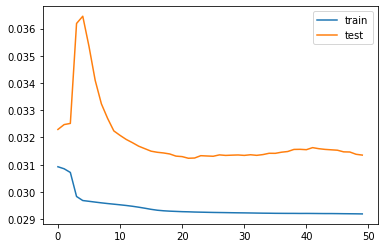

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainX, trainY, epochs=50, batch_size=72, validation_data=(testX, testY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
pred = model.predict(testX)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)
epochs = [i for i in range(len(testY))]
plt.plot(epochs, pred-testY, 'm', label="Differences")
plt.xlabel('Epoch of training') 
plt.ylabel('Predictions of bike number') 
plt.legend()

In [ ]:
 import tensorflow as tf
 
 lstm_model = tf.keras.models.Sequential([
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                                input_shape=trainX.shape[-2:]),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(1),
 ])
 lstm_model.compile(optimizer='adam', loss='mse')
 lstm_model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 1, 400)           334400    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 1, 20)             8020      
                                                                 
 bidirectional_7 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 20)                6020      
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)               

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
history = lstm_model.fit(trainX,trainY, batch_size=72, epochs=2,validation_data=(testX, testY),verbose=1)

Epoch 1/2


10648/10648 [==============================] - 815s 77ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 2/2
10648/10648 [==============================] - 813s 76ms/step - loss: 0.0016 - val_loss: 0.0018


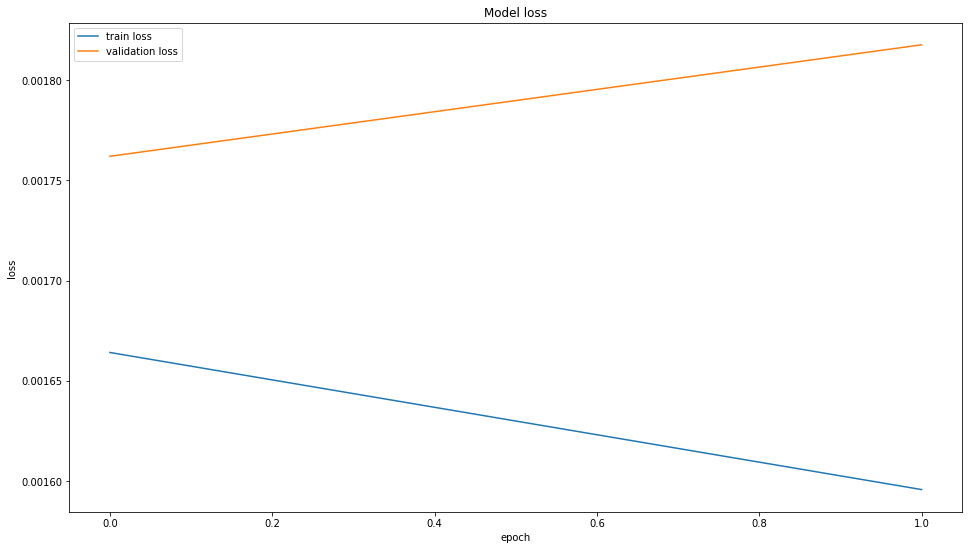

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

In [ ]:
grouped_df.station_id.value_counts()

2585464    670
2585963    670
2585992    670
2585982    670
2585972    670
          ... 
8746360    404
3318614     61
2676298     46
3318697     26
3318744      1
Name: station_id, Length: 337, dtype: int64

In [ ]:
grouped_df['encoded_id'] = ord_enc.fit_transform(grouped_df[["station_id"]])
grouped_df.encoded_id.value_counts()

112.0    670
248.0    670
264.0    670
258.0    670
253.0    670
        ... 
323.0    404
310.0     61
294.0     46
311.0     26
312.0      1
Name: encoded_id, Length: 337, dtype: int64

In [ ]:
counted_correctly.station_id.value_counts()

126.0    2662
95.0     2662
25.0     2662
290.0    2662
296.0    2662
         ... 
323.0    1430
310.0     359
294.0      91
311.0      51
312.0       1
Name: station_id, Length: 337, dtype: int64

In [ ]:
counted_correctly.drop_duplicates(subset ='hour', keep = False, inplace = True)
grouped_df.drop_duplicates(subset ='hour', keep = False, inplace = True)

TypeError: ignored

In [ ]:
grouped_df = pd.merge(grouped_df, stations, left_on='station_id', right_on='uid')
grouped_df.head()

,hour,station_id,bike_number,uid_x,lat_x,lng_x,name_x,bike_racks_x,temp,dwpt,rhum,wdir,wspd,pres,uid_y,lat_y,lng_y,name_y,bike_racks_y
0,2022-04-24 15:00:00,448565,4,448565,52.183992,21.00984,Nestle House,15,15.0,4.1,48.0,50.0,19.0,1005.0,448565,52.183992,21.00984,Nestle House,15
1,2022-04-24 16:00:00,448565,5,448565,52.183992,21.00984,Nestle House,15,14.0,4.0,51.0,50.0,15.0,1004.0,448565,52.183992,21.00984,Nestle House,15
2,2022-04-24 17:00:00,448565,10,448565,52.183992,21.00984,Nestle House,15,14.0,4.0,51.0,50.0,20.0,1003.0,448565,52.183992,21.00984,Nestle House,15
3,2022-04-24 18:00:00,448565,7,448565,52.183992,21.00984,Nestle House,15,12.4,4.4,58.0,60.0,18.0,1004.3,448565,52.183992,21.00984,Nestle House,15
4,2022-04-24 19:00:00,448565,7,448565,52.183992,21.00984,Nestle House,15,13.0,3.9,54.0,70.0,19.0,1004.0,448565,52.183992,21.00984,Nestle House,15


In [ ]:
def get_weather(row):
  # weather for the hour (more or less) of the measurement
  start = row['hour'].to_pydatetime()
  end = row['hour'].to_pydatetime()
  location = Point(float(row.lat), float(row.lng), 100)
  data = Hourly(location, start, end)
  data = data.fetch()
  row['temp'] = data['temp']
  row['dwpt'] = data['dwpt']
  row['rhum'] = data['rhum']
  row['wdir'] = data['wdir']
  row['wspd'] = data['wspd']
  row['pres'] = data['pres']

grouped_df = grouped_df.apply(get_weather, axis=1)
grouped_df.head()

In [ ]:
from google.colab import files

grouped_df.to_csv('grouped-weather-rowerki.csv', encoding = 'utf-8-sig') 
files.download('grouped-weather-rowerki.csv')

NameError: ignored

In [ ]:
grouped_df = pd.read_csv('drive/MyDrive/grouped-weather-rowerki(2).csv', index_col='Unnamed: 0')
grouped_df.head()

,hour,station_id,bike_number,uid,lat,lng,name,bike_racks,temp,dwpt,rhum,wdir,wspd,pres
0,2022-04-24 15:00:00,448565,4,448565,52.183992,21.00984,Nestle House,15,15.0,4.1,48.0,50.0,19.0,1005.0
1,2022-04-24 16:00:00,448565,5,448565,52.183992,21.00984,Nestle House,15,14.0,4.0,51.0,50.0,15.0,1004.0
2,2022-04-24 17:00:00,448565,10,448565,52.183992,21.00984,Nestle House,15,14.0,4.0,51.0,50.0,20.0,1003.0
3,2022-04-24 18:00:00,448565,7,448565,52.183992,21.00984,Nestle House,15,12.4,4.4,58.0,60.0,18.0,1004.3
4,2022-04-24 19:00:00,448565,7,448565,52.183992,21.00984,Nestle House,15,13.0,3.9,54.0,70.0,19.0,1004.0


In [ ]:
len(grouped_df)

218729

In [ ]:
grouped_df.drop_duplicates(inplace=True)
grouped_df.head()

,hour,station_id,bike_number,uid,lat,lng,name,bike_racks,temp,dwpt,rhum,wdir,wspd,pres
0,2022-04-24 15:00:00,448565,4,448565,52.183992,21.00984,Nestle House,15,15.0,4.1,48.0,50.0,19.0,1005.0
1,2022-04-24 16:00:00,448565,5,448565,52.183992,21.00984,Nestle House,15,14.0,4.0,51.0,50.0,15.0,1004.0
2,2022-04-24 17:00:00,448565,10,448565,52.183992,21.00984,Nestle House,15,14.0,4.0,51.0,50.0,20.0,1003.0
3,2022-04-24 18:00:00,448565,7,448565,52.183992,21.00984,Nestle House,15,12.4,4.4,58.0,60.0,18.0,1004.3
4,2022-04-24 19:00:00,448565,7,448565,52.183992,21.00984,Nestle House,15,13.0,3.9,54.0,70.0,19.0,1004.0


In [ ]:
len(grouped_df)

218729

In [ ]:
grouped_df.head()

,hour,station_id,bike_number,uid,lat,lng,name,bike_racks,temp,dwpt,rhum,wdir,wspd,pres
0,2022-04-24 15:00:00,448565,4,448565,52.183992,21.00984,Nestle House,15,15.0,4.1,48.0,50.0,19.0,1005.0
1,2022-04-24 16:00:00,448565,5,448565,52.183992,21.00984,Nestle House,15,14.0,4.0,51.0,50.0,15.0,1004.0
2,2022-04-24 17:00:00,448565,10,448565,52.183992,21.00984,Nestle House,15,14.0,4.0,51.0,50.0,20.0,1003.0
3,2022-04-24 18:00:00,448565,7,448565,52.183992,21.00984,Nestle House,15,12.4,4.4,58.0,60.0,18.0,1004.3
4,2022-04-24 19:00:00,448565,7,448565,52.183992,21.00984,Nestle House,15,13.0,3.9,54.0,70.0,19.0,1004.0


In [ ]:
sample = rowerki_df.iloc[0]

In [ ]:
# Set time period
start = sample['hour'].to_pydatetime()
end = sample['hour'].to_pydatetime()

# Create Point for Vancouver, BC
location = Point(float(sample.lat), float(sample.lng), 100)

# Get daily data for 2018
data = Hourly(location, start, end)
data = data.fetch()
data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2022-04-27 23:00:00,9.0,0.9,57.0,0.0,NaN,60.0,7.0,16.7,1024.0,NaN,2.0


In [ ]:
rowerki_df['hour'] = pd.to_datetime(rowerki_df['date']).dt.floor('H')
rowerki_df.head()

NameError: ignored

In [ ]:
rowerki_df['bike_number'].unique()

array([24900, 24774, 24584, ..., 24862, 91715, 26489])

In [ ]:
rowerki_df.bike_type.value_counts()
# will have to encode later and probably do separate predictions for each maybe

174    10159021
4        834343
37       252643
35        82808
34        80909
14          744
0           270
84          159
114           5
Name: bike_type, dtype: int64

In [ ]:
grouped_df = rowerki_df.groupby(['hour', 'station_id', 'bike_type'])['bike_number'].nunique().reset_index()
grouped_df.head()

,hour,station_id,bike_type,bike_number
0,2022-04-24 15:00:00,448565,174,4
1,2022-04-24 15:00:00,448566,174,3
2,2022-04-24 15:00:00,1154451,174,6
3,2022-04-24 15:00:00,2585259,174,19
4,2022-04-24 15:00:00,2585263,174,12


In [ ]:
rowerki_df[rowerki_df.state != "ok"]

,date,station_id,bike_number,bike_type,state,hour


XD all the gathered bikes are ok, so nothing interesting there

Let's just lose the state then, since it won't be of any use anyway 

In [ ]:
rowerki_df.drop('state', inplace=True, axis=1)

In [ ]:
rowerki_df.head()

,date,station_id,bike_number,bike_type,hour
0,2022-04-27 23:51,2585259,24900,174,2022-04-27 23:00:00
1,2022-04-27 23:51,2585259,24774,174,2022-04-27 23:00:00
2,2022-04-27 23:51,2585259,24584,174,2022-04-27 23:00:00
3,2022-04-27 23:51,2585259,28546,174,2022-04-27 23:00:00
4,2022-04-27 23:51,2585259,28356,174,2022-04-27 23:00:00


In [ ]:
rowerki_df["date"] = pd.to_datetime(rowerki_df["date"])

In [ ]:
rowerki_df.bike_type.value_counts()

174    10159021
4        834343
37       252643
35        82808
34        80909
14          744
0           270
84          159
114           5
Name: bike_type, dtype: int64

try with that weather fetching

In [ ]:
sample_stat = stations[stations.name=="Spektrum Tower"]
int(sample_stat['uid'])

2681635

In [ ]:
sample_rowerki_date = rowerki_df[rowerki_df.station_id == int(sample_stat['uid'])]['date']
sample_rowerki_date

NameError: ignored

In [ ]:
sample_stat.lat

329    52.23439
Name: lat, dtype: float64

Znaczenie tych całych kodów typów 

var AVAILABLE_BIKES = 'Dostępne rowery: ';
var SPOTS = 'Wolne stojaki: ';
var TANDEMS = 'Tandemy: ';
var KID_BIKES = 'Dziecięce: ';
var NORMAL_BIKES = 'Zwykłe rowery: ';
var ELECTRIC_BIKES = 'Elektryczne: ';

var TANDEM_ID = 26;

var KID_ID_4 = 34;
var KID_ID_6 = 35;

var ELECTRIC_ID = 37;

var STANDARD_ID = 174;

var MISSED_BIKES_PLACE_TYPE_ID = 1;

In [ ]:
# Set time period
start = datetime.datetime(2018, 1, 1, 21, 0)
end = datetime.datetime(2018, 1, 1, 23, 0)

# Create Point for Vancouver, BC
location = Point(float(sample_stat.lat), float(sample_stat.lng), 100)

# Get daily data for 2018
data = Hourly(location, start, end)
data = data.fetch()
data

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2018-01-01 21:00:00,4.9,2.9,87.0,NaN,NaN,210.0,3.6,NaN,1005.9,NaN,NaN
2018-01-01 22:00:00,2.8,1.6,92.0,NaN,NaN,190.0,3.6,NaN,1006.3,NaN,NaN
2018-01-01 23:00:00,2.3,1.7,96.0,NaN,NaN,160.0,3.6,NaN,1006.6,NaN,NaN


Looks successful, might be worth it to try and add weather in some form

In [ ]:
rowerki_df.head()

,date,station_id,bike_number,bike_type,hour
0,2022-04-27 23:51:00,2585259,24900,174,2022-04-27 23:00:00
1,2022-04-27 23:51:00,2585259,24774,174,2022-04-27 23:00:00
2,2022-04-27 23:51:00,2585259,24584,174,2022-04-27 23:00:00
3,2022-04-27 23:51:00,2585259,28546,174,2022-04-27 23:00:00
4,2022-04-27 23:51:00,2585259,28356,174,2022-04-27 23:00:00


Add also bike number and number of racks, to see which stations get swamped and how often, and maybe build prediction system based on that.

In [ ]:
bikes = rowerki_df
bikes['prev_station'] = bikes\
.sort_values(by=['date'], kind='stable')\
.groupby(['bike_number'])\
.shift(1)['station_id'].astype('Int64')
bikes['next_station'] = bikes\
.sort_values(by=['date'], kind='stable')\
.groupby(['bike_number'])\
.shift(-1)['station_id'].astype('Int64')
# You can't do next != current because it does not detect loops
bikes['just_returned'] = bikes\
.sort_values(by=['date'], kind='stable')\
.groupby(['bike_number', 'station_id'])\
.shift(1)['date'].isna() | (bikes['prev_station'] != bikes['station_id'])
bikes['just_rented'] = bikes\
.sort_values(by=['date'], kind='stable')\
.groupby(['bike_number', 'station_id'])\
.shift(-1)['date'].isna() | (bikes['next_station'] != bikes['station_id'])
bikes[bikes['bike_number'] == 96033].sort_values(by=['date'], kind='stable')

KeyboardInterrupt: ignored

In [ ]:
grouped = bikes\
.groupby(['date', 'station_id'])\
.aggregate({'bike_number' : len, 'just_returned' : sum,'just_rented' : sum})\
.reset_index()\
.rename(columns={'bike_number': 'bike_count'})\
.merge(stations,left_on = 'station_id', right_on = 'uid')
grouped['just_rented'] = grouped.sort_values(['date']).groupby('station_id').shift(1)['just_rented']
grouped

1. Get weather from the historical api (maybe preprocess it somehow or add feature engineering)
2. Add traffic as returned/taken maybe
3. Prediction with Lstm maybe for both depending on the station too (don't think latitude/longitude will help, but index of station id probably yes, but 

https://www.kaggle.com/code/elmahy/a3t-gcn-for-traffic-forecasting/notebook
https://towardsdatascience.com/predicting-no-of-bike-share-users-machine-learning-data-visualization-project-using-r-71bc1b9a7495
(- here the number of bikes driving around on a given day in total, but may still be useful)
https://medium.com/towards-data-science/cityclass-project-eng-15bc5fcd8e1
(- interesting for the way it recognizes types of buildings nearby and can therefore explain a lot of predictions)